In [45]:
x=1

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import AnnData
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import bar

In [47]:
df_type = {
    'ARI': 'Bio conservation',
    'NMI': 'Bio conservation',
    'Label ASW': 'Bio conservation',
    'Isolated label ASW': 'Bio conservation',
    'Batch ASW': 'Batch correction',
    'Modality ASW': 'Batch correction',
    'Graph Connectivity': 'Batch correction',
    'Bio conservation': 'Aggregate score',
    'Batch correction': 'Aggregate score',
    'Total': 'Aggregate score',
}
df_type = pd.DataFrame(df_type, index=['Metric Type'])
df_type

,ARI,NMI,Label ASW,Isolated label ASW,Batch ASW,Modality ASW,Graph Connectivity,Bio conservation,Batch correction,Total
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [48]:
df_momat = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/scmomat_trimodal_in.csv', index_col=0, header=0)
df_momat = df_momat.rename(index={0: 'scMoMaT'})
df_momat

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
scMoMaT,0.442832,0.62909,0.614866,0.488058,0.912182,0.875704,0.683804


In [49]:
df_glue_p = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/glue_paired_trimodal_in.csv', index_col=0, header=0)
df_glue_p = df_glue_p.rename(index={0: 'GLUE\n (paired)'})
df_glue_p

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
GLUE\n (paired),0.754916,0.772584,0.382977,0.598543,0.868662,0.938302,0.737746


In [50]:
df_glue_u = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/glue_unpaired_trimodal_in.csv', index_col=0, header=0)
df_glue_u = df_glue_u.rename(index={0: 'GLUE\n (unpaired)'})
df_glue_u

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
GLUE\n (unpaired),0.418718,0.593719,0.466702,0.505501,0.861953,0.82279,0.634644


In [51]:
df_glue_pa = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/averaged_glue_paired_trimodal_in.csv', index_col=0, header=0)
df_glue_pa = df_glue_pa.rename(index={0: 'GLUE\n (paired, avg.)'})
df_glue_pa

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
"GLUE\n (paired, avg.)",0.783702,0.806646,0.379676,0.618467,0.84275,0.949497,0.746723


In [52]:
df_glue_ua = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/averaged_glue_unpaired_trimodal_in.csv', index_col=0, header=0)
df_glue_ua = df_glue_ua.rename(index={0: 'GLUE\n (unpaired, avg.)'})
df_glue_ua

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
"GLUE\n (unpaired, avg.)",0.455927,0.7014,0.432806,0.547837,0.873513,0.929381,0.681274


In [53]:
df_multigrate = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/data/multigrate/ref/multimil_trimodal_ref.csv', index_col=0, header=0)
df_multigrate = df_multigrate.rename(index={0: 'Multigrate'})
df_multigrate

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
Multigrate,0.76965,0.806803,0.494014,0.547144,0.93055,0.954652,0.769682


In [54]:
df_multimap_paired = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/paired_multimap_trimodal_integrated.csv', index_col=0, header=0)
df_multimap_paired = df_multimap_paired.rename(index={0: 'MultiMAP\n (avg.)'})
df_multimap_paired

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
MultiMAP\n (avg.),0.354589,0.581249,0.545775,0.491858,0.771427,0.651034,0.580513


In [55]:
df_multimap_unpaired = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/unpaired_multimap_trimodal_in.csv', index_col=0, header=0)
df_multimap_unpaired = df_multimap_unpaired.rename(index={0: 'MultiMAP'})
df_multimap_unpaired

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
MultiMAP,0.252826,0.51024,0.407816,0.482447,0.780784,0.577637,0.519684


In [56]:
df = pd.concat([df_momat, df_multigrate, df_multimap_paired, df_multimap_unpaired, df_glue_p, df_glue_u, df_glue_ua, df_glue_pa])
df

,ARI,NMI,Isolated label score ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score
scMoMaT,0.442832,0.629090,0.614866,0.488058,0.912182,0.875704,0.683804
Multigrate,0.769650,0.806803,0.494014,0.547144,0.930550,0.954652,0.769682
MultiMAP\n (avg.),0.354589,0.581249,0.545775,0.491858,0.771427,0.651034,0.580513
MultiMAP,0.252826,0.510240,0.407816,0.482447,0.780784,0.577637,0.519684
GLUE\n (paired),0.754916,0.772584,0.382977,0.598543,0.868662,0.938302,0.737746
GLUE\n (unpaired),0.418718,0.593719,0.466702,0.505501,0.861953,0.822790,0.634644
"GLUE\n (unpaired, avg.)",0.455927,0.701400,0.432806,0.547837,0.873513,0.929381,0.681274
"GLUE\n (paired, avg.)",0.783702,0.806646,0.379676,0.618467,0.842750,0.949497,0.746723


In [57]:
df = df.rename(columns={'Isolated label score ASW': 'Isolated label ASW'})

In [58]:
df_momat = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/modality_scmomat_trimodal_in.csv', index_col=0, header=0)
df_momat = df_momat.rename(index={0: 'scMoMaT'})
df_momat

,Isolated label score ASW,Batch ASW,Overall Score
scMoMaT,0.583708,0.642276,0.607135


In [59]:
df_glue_p = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/modality_glue_paired_trimodal_in.csv', index_col=0, header=0)
df_glue_p = df_glue_p.rename(index={0: 'GLUE\n (paired)'})
df_glue_p

,Isolated label score ASW,Batch ASW,Overall Score
GLUE\n (paired),0.441165,0.865966,0.611085


In [60]:
df_glue_u = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/modality_glue_unpaired_trimodal_in.csv', index_col=0, header=0)
df_glue_u = df_glue_u.rename(index={0: 'GLUE\n (unpaired)'})
df_glue_u

,Isolated label score ASW,Batch ASW,Overall Score
GLUE\n (unpaired),0.488003,0.732991,0.585998


In [61]:
df_glue_pa = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/modality_averaged_glue_paired_trimodal_in.csv', index_col=0, header=0)
df_glue_pa = df_glue_pa.rename(index={0: 'GLUE\n (paired, avg.)'})
df_glue_pa

,Isolated label score ASW,Batch ASW,Overall Score
"GLUE\n (paired, avg.)",0.464421,0.826969,0.60944


In [62]:
df_glue_ua = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/modality_averaged_glue_unpaired_trimodal_in.csv', index_col=0, header=0)
df_glue_ua = df_glue_ua.rename(index={0: 'GLUE\n (unpaired, avg.)'})
df_glue_ua

,Isolated label score ASW,Batch ASW,Overall Score
"GLUE\n (unpaired, avg.)",0.567184,0.65759,0.603346


In [63]:
df_multigrate = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/data/multigrate/ref/multimil_trimodal_ref_modality.csv', index_col=0, header=0)
df_multigrate = df_multigrate.rename(index={0: 'Multigrate'})
df_multigrate

,Isolated label score ASW,Batch ASW,Overall Score
Multigrate,0.527681,0.924563,0.686434


In [64]:
df_multimap_paired = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/modality_paired_multimap_trimodal_integrated.csv', index_col=0, header=0)
df_multimap_paired = df_multimap_paired.rename(index={0: 'MultiMAP\n (avg.)'})
df_multimap_paired

,Isolated label score ASW,Batch ASW,Overall Score
MultiMAP\n (avg.),0.532245,0.654994,0.581345


In [65]:
df_multimap_unpaired = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/trimodal/metrics/modality_unpaired_multimap_trimodal_in.csv', index_col=0, header=0)
df_multimap_unpaired = df_multimap_unpaired.rename(index={0: 'MultiMAP'})
df_multimap_unpaired

,Isolated label score ASW,Batch ASW,Overall Score
MultiMAP,0.430217,0.700571,0.538359


In [66]:
df_mod = pd.concat([df_momat, df_multigrate, df_multimap_paired, df_multimap_unpaired, df_glue_p, df_glue_u, df_glue_ua, df_glue_pa])
df_mod

,Isolated label score ASW,Batch ASW,Overall Score
scMoMaT,0.583708,0.642276,0.607135
Multigrate,0.527681,0.924563,0.686434
MultiMAP\n (avg.),0.532245,0.654994,0.581345
MultiMAP,0.430217,0.700571,0.538359
GLUE\n (paired),0.441165,0.865966,0.611085
GLUE\n (unpaired),0.488003,0.732991,0.585998
"GLUE\n (unpaired, avg.)",0.567184,0.657590,0.603346
"GLUE\n (paired, avg.)",0.464421,0.826969,0.609440


In [67]:
df_mod = df_mod.rename(columns={'Batch ASW': 'Modality ASW'})
df_mod

,Isolated label score ASW,Modality ASW,Overall Score
scMoMaT,0.583708,0.642276,0.607135
Multigrate,0.527681,0.924563,0.686434
MultiMAP\n (avg.),0.532245,0.654994,0.581345
MultiMAP,0.430217,0.700571,0.538359
GLUE\n (paired),0.441165,0.865966,0.611085
GLUE\n (unpaired),0.488003,0.732991,0.585998
"GLUE\n (unpaired, avg.)",0.567184,0.657590,0.603346
"GLUE\n (paired, avg.)",0.464421,0.826969,0.609440


In [68]:
df = df.join(df_mod['Modality ASW'])
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score,Modality ASW
scMoMaT,0.442832,0.629090,0.614866,0.488058,0.912182,0.875704,0.683804,0.642276
Multigrate,0.769650,0.806803,0.494014,0.547144,0.930550,0.954652,0.769682,0.924563
MultiMAP\n (avg.),0.354589,0.581249,0.545775,0.491858,0.771427,0.651034,0.580513,0.654994
MultiMAP,0.252826,0.510240,0.407816,0.482447,0.780784,0.577637,0.519684,0.700571
GLUE\n (paired),0.754916,0.772584,0.382977,0.598543,0.868662,0.938302,0.737746,0.865966
GLUE\n (unpaired),0.418718,0.593719,0.466702,0.505501,0.861953,0.822790,0.634644,0.732991
"GLUE\n (unpaired, avg.)",0.455927,0.701400,0.432806,0.547837,0.873513,0.929381,0.681274,0.657590
"GLUE\n (paired, avg.)",0.783702,0.806646,0.379676,0.618467,0.842750,0.949497,0.746723,0.826969


In [69]:
df.loc[:, 'Bio conservation'] = np.mean([df.loc[:, 'ARI'], df.loc[:, 'NMI'], df.loc[:, 'Isolated label ASW'], df.loc[:, 'Label ASW']], axis=0)
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score,Modality ASW,Bio conservation
scMoMaT,0.442832,0.629090,0.614866,0.488058,0.912182,0.875704,0.683804,0.642276,0.543712
Multigrate,0.769650,0.806803,0.494014,0.547144,0.930550,0.954652,0.769682,0.924563,0.654403
MultiMAP\n (avg.),0.354589,0.581249,0.545775,0.491858,0.771427,0.651034,0.580513,0.654994,0.493368
MultiMAP,0.252826,0.510240,0.407816,0.482447,0.780784,0.577637,0.519684,0.700571,0.413332
GLUE\n (paired),0.754916,0.772584,0.382977,0.598543,0.868662,0.938302,0.737746,0.865966,0.627255
GLUE\n (unpaired),0.418718,0.593719,0.466702,0.505501,0.861953,0.822790,0.634644,0.732991,0.496160
"GLUE\n (unpaired, avg.)",0.455927,0.701400,0.432806,0.547837,0.873513,0.929381,0.681274,0.657590,0.534493
"GLUE\n (paired, avg.)",0.783702,0.806646,0.379676,0.618467,0.842750,0.949497,0.746723,0.826969,0.647123


In [70]:
df.loc[:, 'Batch correction'] = np.mean([df.loc[:, 'Batch ASW'], df.loc[:, 'Modality ASW'], df.loc[:, 'Graph Connectivity']], axis=0)
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Overall Score,Modality ASW,Bio conservation,Batch correction
scMoMaT,0.442832,0.629090,0.614866,0.488058,0.912182,0.875704,0.683804,0.642276,0.543712,0.810054
Multigrate,0.769650,0.806803,0.494014,0.547144,0.930550,0.954652,0.769682,0.924563,0.654403,0.936589
MultiMAP\n (avg.),0.354589,0.581249,0.545775,0.491858,0.771427,0.651034,0.580513,0.654994,0.493368,0.692485
MultiMAP,0.252826,0.510240,0.407816,0.482447,0.780784,0.577637,0.519684,0.700571,0.413332,0.686331
GLUE\n (paired),0.754916,0.772584,0.382977,0.598543,0.868662,0.938302,0.737746,0.865966,0.627255,0.890977
GLUE\n (unpaired),0.418718,0.593719,0.466702,0.505501,0.861953,0.822790,0.634644,0.732991,0.496160,0.805911
"GLUE\n (unpaired, avg.)",0.455927,0.701400,0.432806,0.547837,0.873513,0.929381,0.681274,0.657590,0.534493,0.820161
"GLUE\n (paired, avg.)",0.783702,0.806646,0.379676,0.618467,0.842750,0.949497,0.746723,0.826969,0.647123,0.873072


In [71]:
df = df.rename(columns={'Overall Score': 'Total'})
df

,ARI,NMI,Isolated label ASW,Label ASW,Batch ASW,Graph Connectivity,Total,Modality ASW,Bio conservation,Batch correction
scMoMaT,0.442832,0.629090,0.614866,0.488058,0.912182,0.875704,0.683804,0.642276,0.543712,0.810054
Multigrate,0.769650,0.806803,0.494014,0.547144,0.930550,0.954652,0.769682,0.924563,0.654403,0.936589
MultiMAP\n (avg.),0.354589,0.581249,0.545775,0.491858,0.771427,0.651034,0.580513,0.654994,0.493368,0.692485
MultiMAP,0.252826,0.510240,0.407816,0.482447,0.780784,0.577637,0.519684,0.700571,0.413332,0.686331
GLUE\n (paired),0.754916,0.772584,0.382977,0.598543,0.868662,0.938302,0.737746,0.865966,0.627255,0.890977
GLUE\n (unpaired),0.418718,0.593719,0.466702,0.505501,0.861953,0.822790,0.634644,0.732991,0.496160,0.805911
"GLUE\n (unpaired, avg.)",0.455927,0.701400,0.432806,0.547837,0.873513,0.929381,0.681274,0.657590,0.534493,0.820161
"GLUE\n (paired, avg.)",0.783702,0.806646,0.379676,0.618467,0.842750,0.949497,0.746723,0.826969,0.647123,0.873072


In [72]:
df['Total'] = 0.6*df['Bio conservation'] + 0.4*df['Batch correction']

In [73]:
df = pd.concat([df, df_type])

In [74]:
score_cols = df.columns[df.loc['Metric Type'] == 'Aggregate score']
other_cols = df.columns[df.loc['Metric Type'] != 'Aggregate score']

In [75]:
plot_df = df.drop('Metric Type', axis=0)

In [76]:
plot_df = plot_df.sort_values(by="Total", ascending=False).astype(np.float64)

In [77]:
plot_df["Method"] = plot_df.index

In [78]:
column_definitions = [
    ColumnDefinition("Method", width=1.5, textprops={"ha": "left", "weight": "bold"}),
]

In [79]:
other_cols = ['ARI', 'NMI', 'Isolated label ASW', 'Label ASW', 'Batch ASW', 'Modality ASW', 'Graph Connectivity']

In [80]:
cmap_fn = lambda col_data: normed_cmap(col_data, cmap=matplotlib.cm.PRGn, num_stds=2.5)

# Circles for the metric values
column_definitions += [
    ColumnDefinition(
        col,
        title=col.replace(" ", "\n", 1),
        width=1,
        textprops={
            "ha": "center",
            "bbox": {"boxstyle": "circle", "pad": 0.25},
        },
        cmap=cmap_fn(plot_df[col]),
        group=df.loc['Metric Type', col],
        formatter="{:.2f}",
    )
    for i, col in enumerate(other_cols)
]

In [81]:
score_cols = ['Bio conservation', 'Batch correction', 'Total']

In [82]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

In [83]:
light_cmap = cmap_map(lambda x: x/2 + 0.5, matplotlib.cm.YlGnBu)

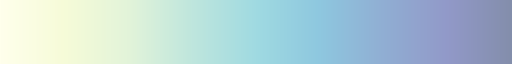

In [84]:
light_cmap

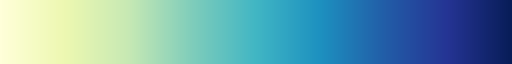

In [85]:
matplotlib.cm.YlGnBu

In [86]:
cmap_fn = lambda col_data: normed_cmap(col_data, cmap=light_cmap, num_stds=2.5)

# Bars for the aggregate scores
column_definitions += [
    ColumnDefinition(
        col,
        width=1,
        title=col.replace(" ", "\n", 1),
        plot_fn=bar,
        plot_kw={
            "cmap": cmap_fn(plot_df[col]),
            "plot_bg_bar": False,
            "annotate": True,
            "height": 0.9,
            "formatter": "{:.2f}",
        },
        group=df.loc['Metric Type', col],
        border="left" if i == 0 else None,
    )
    for i, col in enumerate(score_cols)
]

In [87]:
plot_df=plot_df[[
    'ARI', 'NMI', 'Isolated label ASW', 'Label ASW',
    'Batch ASW', 'Modality ASW', 'Graph Connectivity',
    'Bio conservation', 'Batch correction', 
    'Total', 'Method'
]]

In [88]:
num_embeds = len(plot_df)

# Allow to manipulate text post-hoc (in illustrator)
with matplotlib.rc_context({"svg.fonttype": "none"}):
    fig, ax = plt.subplots(figsize=(len(df.columns) * 1.25, 3 + 0.3 * num_embeds))
    tab = Table(
        plot_df,
        cell_kw={
            "linewidth": 0,
            "edgecolor": "k",
        },
        column_definitions=column_definitions,
        ax=ax,
        row_dividers=True,
        footer_divider=True,
        textprops={"fontsize": 9, "ha": "center"},
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
        column_border_kw={"linewidth": 1, "linestyle": "-"},
        index_col="Method",
    ).autoset_fontcolors(colnames=plot_df.columns)

plt.savefig('figures/scib_metrics_trimodal_ref.svg', bbox_inches='tight')